In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import time
%matplotlib inline
from scipy import stats

In [16]:
info = pd.read_csv("../../Figures/MCMCFigures/Weibull_Parameters_266.csv", index_col="Unnamed: 0")
info = info[~((info["Gamma"]>10) + (np.abs(info["Location"]) >10)  + (info["Alpha"]< 0.01 ) )]
print info.max(axis= 0), info.min(axis = 0) 
print info.shape
info.head()

ID          24946.000000
Gamma           9.306941
Location        6.036551
Alpha           4.063128
dtype: float64 ID          1.000000
Gamma       0.058621
Location    0.403578
Alpha       0.012473
dtype: float64
(260, 4)


,ID,Gamma,Location,Alpha
0,1007.0,2.614027,4.447527,1.283371
1,1021.0,3.269655,4.989150,1.129664
2,1025.0,2.249906,4.965337,0.938566
3,1041.0,1.856930,4.863439,0.972277
4,10518.0,1.596694,5.781111,0.761953


(26, 4)


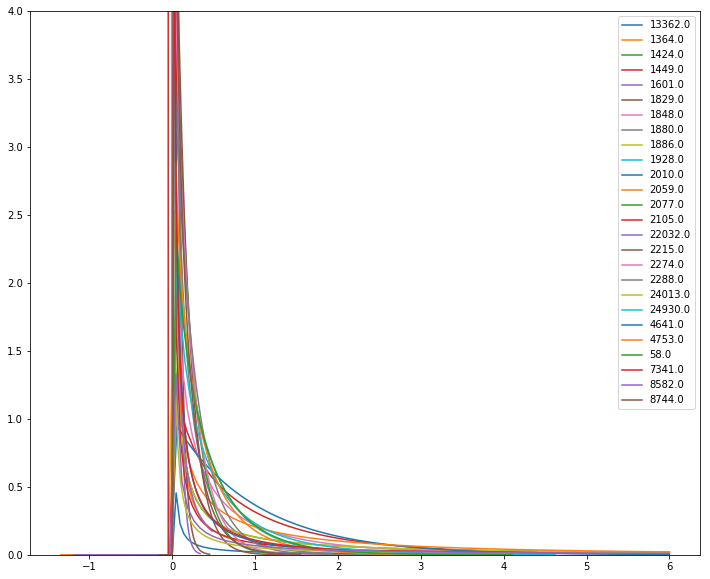

In [42]:
info_gamma=info[info["Gamma"]<1]

def plot_figs(info_gamma, y_lim = None):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot("111")
    print(info_gamma.shape)
    for i in range(info_gamma.shape[0]):
        id_name, gamma, mean, alpha = info_gamma.iloc[i].values
        end = min(10*alpha,6)
        x = np.linspace(-alpha, end , 100)
        vals = stats.weibull_min.pdf(x,c=gamma,loc=0,scale = alpha)
        ax.plot(x, vals, label = id_name)
    if y_lim ==None:
        plt.ylim(0,4)
    else:
        plt.ylim(y_lim)
    plt.legend()
    plt.show()
plot_figs(info_gamma)

(26, 4)


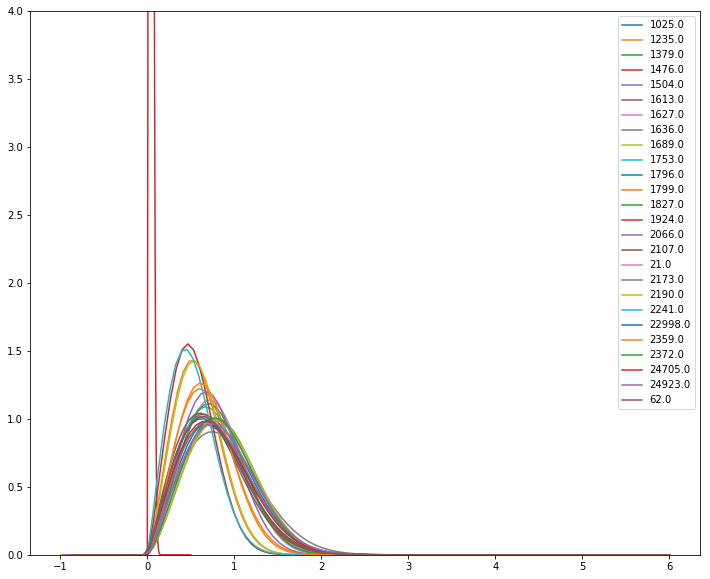

In [43]:
gauss_like=info[(info["Gamma"]>2) & (info["Gamma"]<2.5) & (info["Alpha"]<1)]
plot_figs(gauss_like)

(42, 4)


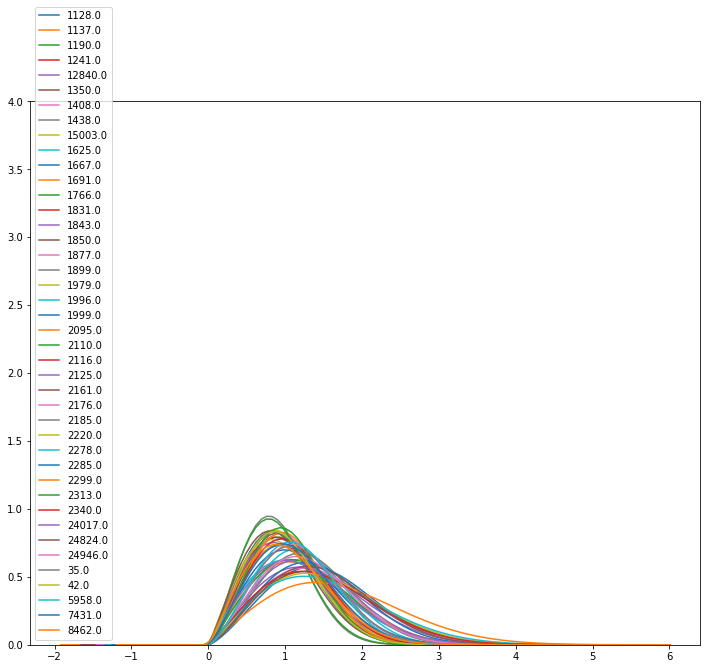

In [45]:
gauss_like=info[(info["Gamma"]>2) & (info["Gamma"]<2.5) & (info["Alpha"]>1) & (info["Alpha"]<2)]
plot_figs(gauss_like)